<big>**<center>Project 3<br> Pavlos Logdanidis 2071 ,  Vasilopoulos Vasileios 2024<center>**<big>

In [91]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from pandas import read_csv
import pandas as pd

In [92]:
df=read_csv('bikeshare.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [93]:
df.shape

(10886, 12)

# Data preperation

## Drop irrelevant columns

In [94]:
#'datetime' is irrelevant in our opinion considering all the other features we have.Also we just want to predict the total
#number of bikes so we drop features 'casual' and 'registerd' as well
relevant=df.drop(['datetime','casual','registered'],axis=1)
relevant.shape

(10886, 9)

## Dummy variables

In [95]:
#season and weather are nominal variables so we need to create dummy variables to represent them
dummies = pd.get_dummies(relevant,drop_first =True,columns=['season','weather'])
dummies.shape

(10886, 13)

## Normalize data

In [96]:
data=dummies.values
X=dummies.loc[:,dummies.columns!='count'].values
Y=dummies.loc[:,dummies.columns=='count'].values
X=normalize(X,axis=0)
Y=normalize(Y,axis=0)

# Hyperparameters

In [97]:
learning_rate = 0.09
max_iteration = 500

In [98]:
s_learning_rate = 0.06
s_max_iteration = 500

In [99]:
mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

# Parameters

In [100]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

## Hypothesis

In [101]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

# Loss Function

In [102]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

# Calculate Gradients

In [103]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

# Batch Gradient Descent

In [104]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

# Mini-Batch Gradient Descent

In [105]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

# Stochastic Gradient Descent

In [106]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

# Train Model

In [107]:
theta_final, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  4.1759762530032895e-05
iteration :  100  loss :  2.1675867940191118e-05
iteration :  200  loss :  2.1672931912099408e-05
iteration :  300  loss :  2.1669998780675575e-05
iteration :  400  loss :  2.1667068414251492e-05


In [108]:
s_theta_final, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  2.326990669728153e-05
iteration :  100  loss :  2.055530230348636e-05
iteration :  200  loss :  2.1045822692550395e-05
iteration :  300  loss :  2.208224382624024e-05
iteration :  400  loss :  2.314198764507716e-05


In [109]:
mb_theta_final, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  2.2148951761910148e-05
iteration :  100  loss :  2.163094755083977e-05
iteration :  200  loss :  2.1445529264407493e-05
iteration :  300  loss :  2.1450281924578127e-05
iteration :  400  loss :  2.1565010977533174e-05


# Optimal values of Parameters using Trained Model

In [110]:
theta_final

array([[ 6.95381356e-03],
       [-3.82314417e-06],
       [ 7.35122369e-05],
       [ 4.64357728e-04],
       [ 4.35673699e-04],
       [-2.03896615e-04],
       [ 2.10897332e-04],
       [ 2.19150072e-04],
       [ 3.69169193e-04],
       [ 9.20031776e-05],
       [-6.68935476e-05],
       [-3.01035718e-04],
       [-3.48018165e-06]])

In [111]:
s_theta_final

array([[ 0.00808687],
       [ 0.00204697],
       [ 0.05361457],
       [ 0.43959181],
       [ 0.40470544],
       [-0.70194667],
       [ 0.11604687],
       [ 0.02713557],
       [ 0.01458634],
       [-0.01137632],
       [ 0.00470641],
       [-0.01154412],
       [ 0.00512365]])

In [112]:
mb_theta_final

array([[ 0.00804021],
       [-0.00464331],
       [ 0.01159321],
       [ 0.1173059 ],
       [ 0.10941719],
       [-0.14998025],
       [ 0.0953681 ],
       [ 0.03961171],
       [ 0.00905495],
       [-0.02781718],
       [-0.02768182],
       [-0.0665333 ],
       [ 0.00174896]])

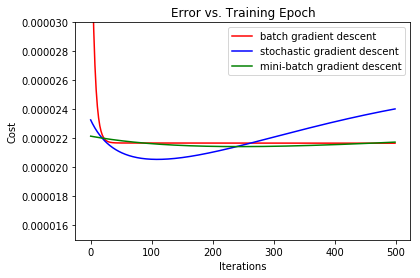

In [113]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
ax.set_ylim(0.000015,0.00003)
plt.show()

# Adagrad

In [114]:
def adagrad(theta_zero, X, Y, max_iteration, gap,fudge_factor = 1e-6, learning_rate = 1e-2):
    
    cost = np.zeros(max_iteration) #init cost
    gti=np.zeros((theta_zero.shape[0],1)) #diagonal elements of Gt matrix
    theta=theta_zero #initialize parameters 

    for i in range(max_iteration) :
        d_theta = gradient(theta, X, Y) #gradient w.r.t. parameters theta
        gti+=d_theta**2  #sum of the squares of the gradients w.r.t. theta up to time step t

        adjusted_grad = d_theta / (fudge_factor + np.sqrt(gti))
        theta = theta - learning_rate * adjusted_grad

        cost[i] = loss(theta, X, Y)
        if i % gap == 0 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 

    return theta, cost 

## Hyperparameters / Parameters

In [115]:
ada_learning_rate = 0.09
ada_max_iteration = 500
ada_fudge_factor = 1e-6

In [116]:
ada_theta = np.zeros((data.shape[1], 1))

## Train model

In [117]:
ada_theta_final, ada_cost = adagrad(ada_theta,X,Y,ada_max_iteration,100,ada_fudge_factor,ada_learning_rate)

iteration :  0  loss :  0.003972479426264115
iteration :  100  loss :  1.9157789618450337e-05
iteration :  200  loss :  1.8229193527751453e-05
iteration :  300  loss :  1.7681937593692154e-05
iteration :  400  loss :  1.730970178286548e-05


## Optimal values of Parameters using Trained Model

In [118]:
ada_theta_final

array([[ 0.00263249],
       [-0.00511383],
       [ 0.007183  ],
       [ 0.23805737],
       [ 0.21931665],
       [-0.22405038],
       [ 0.11064328],
       [ 0.10096158],
       [ 0.09260342],
       [ 0.14461201],
       [-0.02241472],
       [-0.06743623],
       [ 0.003856  ]])

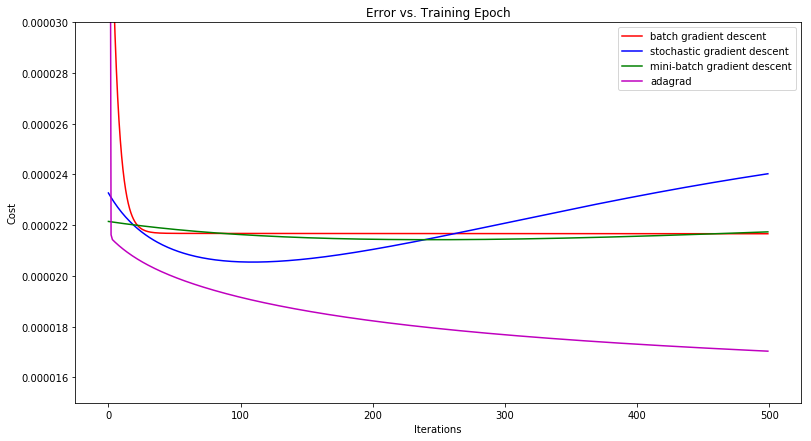

In [119]:
#plot the cost
fig, ax = plt.subplots(figsize=(13,7))  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.plot(np.arange(max_iteration), ada_cost, 'm')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent','adagrad'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
ax.set_ylim(0.000015,0.00003)

plt.show()

# Observations

Adagrad outperforms all the other methods we used (with our specific hyperparameters).SGD seems to perform rather bad with an increasing cost after about 100 epochs.Let's try to improve its performance by introducing a decaying learning rate after 100 epochs.

In [120]:
def stochastic_gradient_descent_with_decay (theta, X, Y, learning_rate, max_iteration, gap,decay=0.9) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    
    if(i>100):
        learning_rate=learning_rate*decay #decrease learning rate after 100 epochs
        
    if i % gap == 0 :
        
        print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [88]:
sd_theta_final, sd_cost = stochastic_gradient_descent_with_decay(s_theta, X, Y, s_learning_rate, s_max_iteration, 100,decay=0.96)

iteration :  0  loss :  2.326990669728153e-05
iteration :  100  loss :  2.055530230348636e-05
iteration :  200  loss :  2.1182661696449462e-05
iteration :  300  loss :  1.7684678909705827e-05
iteration :  400  loss :  1.767618680112351e-05


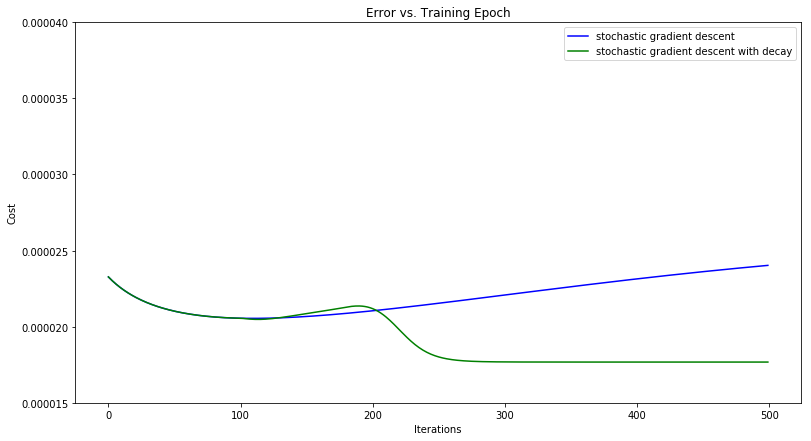

In [121]:
#plot the cost
fig, ax = plt.subplots(figsize=(13,7))  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), sd_cost, 'g')  
ax.legend(loc='upper right', labels=[ 'stochastic gradient descent', 'stochastic gradient descent with decay'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
ax.set_ylim(0.000015,0.00004)

plt.show()

We borrowed the idea of a decreasing learning rate from Adagrad,in a simpler form with a decaying learning rate by a factor of 0.96 after 100 epochs.As we can see there is a big difference in the error after the same number of iterations.This shows us that the learning rate is a very important subject in its own and finding optimal methods of varying it can lead to big improvements in performance.

Comparing everything in the same plot.

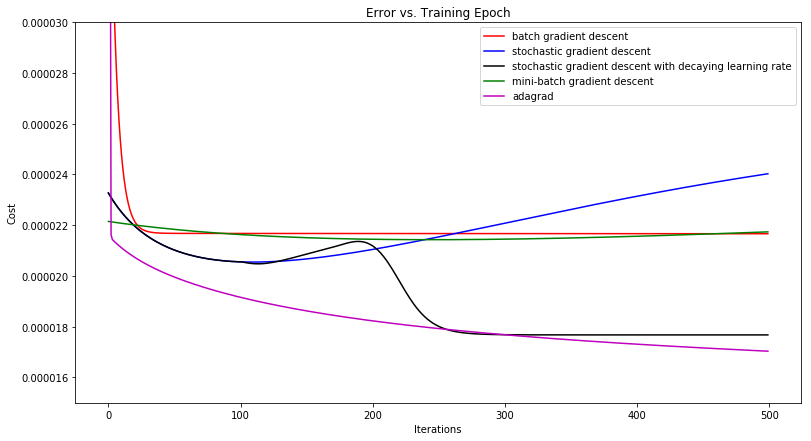

In [123]:
#plot the cost
fig, ax = plt.subplots(figsize=(13,7))  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b') 
ax.plot(np.arange(max_iteration), sd_cost, 'k')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.plot(np.arange(max_iteration), ada_cost, 'm')  
ax.legend(loc='upper right', labels=['batch gradient descent','stochastic gradient descent', 'stochastic gradient descent with decaying learning rate', 'mini-batch gradient descent','adagrad'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
ax.set_ylim(0.000015,0.00003)

plt.show()

It is no surprize that Adagrad still outperforms our modified SGD since in our implementation we just casualy descrease the learning rate which is nothing too sophisticated.